## Descarga y carga de datos

In [1]:
import pandas as pd
import requests
from io import BytesIO
from io import StringIO
import matplotlib.pyplot as plt
from dython import nominal
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import calendar

In [2]:
# URL del repositorio en GitHub
repo_url = 'https://api.github.com/repos/Pacheco-Carvajal/GPA-Data-ElectroDunas/contents/'

# Haz una solicitud GET a la API de GitHub para obtener la lista de archivos en el directorio
response = requests.get(repo_url)
file_data = response.json()

# Filtra los archivos que contienen "datos cliente" en su nombre
desired_files = [(file['download_url'], file['name']) for file in file_data if 'DATOSCLIENTE' in file['name']]

# Crea un DataFrame combinando todos los archivos encontrados
dfs = []
for file_url, file_name in desired_files:
    response = requests.get(file_url)
    content = response.content.decode('utf-8')
    df = pd.read_csv(StringIO(content))

    # Agrega una columna "fuente" con el nombre del archivo
    df['fuente'] = file_name

    dfs.append(df)

# Concatena los DataFrames en uno solo
result_df = pd.concat(dfs, ignore_index=True)

In [3]:
# URL cruda del archivo en GitHub
url = "https://github.com/Pacheco-Carvajal/GPA-Data-ElectroDunas/raw/main/sector_economico_clientes.xlsx"

# Cargar el archivo Excel en un DataFrame
sectores = pd.read_excel(url)

# Mostrar las primeras filas del DataFrame
sectores.head()

,Cliente:,Sector Económico:
0,Cliente 1,Elaboración de cacao y chocolate y de producto...
1,Cliente 2,Elaboración de cacao y chocolate y de producto...
2,Cliente 3,Elaboración de cacao y chocolate y de producto...
3,Cliente 4,Elaboración de cacao y chocolate y de producto...
4,Cliente 5,Elaboración de cacao y chocolate y de producto...


## Unificar bases de datos de clientes y sector económico

In [4]:
# Extraer los números de la columna 'fuente'
result_df['fuente'] = result_df['fuente'].str.extract('(\d+)')

# Concatenar 'Cliente' con los números extraídos
result_df['fuente'] = 'Cliente ' + result_df['fuente']

result_df.head()

,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,fuente
0,2021-01-01 00:00:00,0.357841,0.282788,455.139171,510.561002,Cliente 1
1,2021-01-01 01:00:00,0.372264,0.431377,469.978787,469.917178,Cliente 1
2,2021-01-01 02:00:00,1.044687,0.338626,468.721120,546.949147,Cliente 1
3,2021-01-01 03:00:00,0.566425,0.495791,452.329255,444.122989,Cliente 1
4,2021-01-01 04:00:00,1.080556,0.472018,513.477596,535.463719,Cliente 1


In [5]:
result_df = result_df.rename(columns={'fuente': 'Cliente'})
sectores = sectores.rename(columns={'Cliente:': 'Cliente'})
sectores['Cliente'] = sectores['Cliente'].str.strip()

In [6]:
result_df.head()

,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,Cliente
0,2021-01-01 00:00:00,0.357841,0.282788,455.139171,510.561002,Cliente 1
1,2021-01-01 01:00:00,0.372264,0.431377,469.978787,469.917178,Cliente 1
2,2021-01-01 02:00:00,1.044687,0.338626,468.721120,546.949147,Cliente 1
3,2021-01-01 03:00:00,0.566425,0.495791,452.329255,444.122989,Cliente 1
4,2021-01-01 04:00:00,1.080556,0.472018,513.477596,535.463719,Cliente 1


In [7]:
sectores.head()

,Cliente,Sector Económico:
0,Cliente 1,Elaboración de cacao y chocolate y de producto...
1,Cliente 2,Elaboración de cacao y chocolate y de producto...
2,Cliente 3,Elaboración de cacao y chocolate y de producto...
3,Cliente 4,Elaboración de cacao y chocolate y de producto...
4,Cliente 5,Elaboración de cacao y chocolate y de producto...


In [8]:
result_df = pd.merge(result_df, sectores[['Cliente', 'Sector Económico:']], on='Cliente', how='left')
result_df.head()

,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,Cliente,Sector Económico:
0,2021-01-01 00:00:00,0.357841,0.282788,455.139171,510.561002,Cliente 1,Elaboración de cacao y chocolate y de producto...
1,2021-01-01 01:00:00,0.372264,0.431377,469.978787,469.917178,Cliente 1,Elaboración de cacao y chocolate y de producto...
2,2021-01-01 02:00:00,1.044687,0.338626,468.721120,546.949147,Cliente 1,Elaboración de cacao y chocolate y de producto...
3,2021-01-01 03:00:00,0.566425,0.495791,452.329255,444.122989,Cliente 1,Elaboración de cacao y chocolate y de producto...
4,2021-01-01 04:00:00,1.080556,0.472018,513.477596,535.463719,Cliente 1,Elaboración de cacao y chocolate y de producto...


In [9]:
result_df = result_df.rename(columns={'Sector Económico:': 'Sector Económico'})

In [10]:
result_df.shape

(463425, 7)

In [11]:
result_df.head()

,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,Cliente,Sector Económico
0,2021-01-01 00:00:00,0.357841,0.282788,455.139171,510.561002,Cliente 1,Elaboración de cacao y chocolate y de producto...
1,2021-01-01 01:00:00,0.372264,0.431377,469.978787,469.917178,Cliente 1,Elaboración de cacao y chocolate y de producto...
2,2021-01-01 02:00:00,1.044687,0.338626,468.721120,546.949147,Cliente 1,Elaboración de cacao y chocolate y de producto...
3,2021-01-01 03:00:00,0.566425,0.495791,452.329255,444.122989,Cliente 1,Elaboración de cacao y chocolate y de producto...
4,2021-01-01 04:00:00,1.080556,0.472018,513.477596,535.463719,Cliente 1,Elaboración de cacao y chocolate y de producto...


## Exploración de datos

#### Columnas, tipos de datos y cantidad de registros

In [12]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463425 entries, 0 to 463424
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Fecha             463425 non-null  object 
 1   Active_energy     463425 non-null  float64
 2   Reactive_energy   463425 non-null  float64
 3   Voltaje_FA        463425 non-null  float64
 4   Voltaje_FC        463425 non-null  float64
 5   Cliente           463425 non-null  object 
 6   Sector Económico  463425 non-null  object 
dtypes: float64(4), object(3)
memory usage: 24.7+ MB


#### Estadísticas descriptivas de los datos

In [13]:
result_df.describe()

,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC
count,463425.000000,463425.000000,463425.000000,463425.000000
mean,1.472050,0.873086,1420.188470,1438.515836
std,1.718780,1.158846,766.299118,746.447449
min,-1.329018,0.000000,0.031000,0.031000
25%,0.242788,0.112832,719.462874,748.148254
50%,0.810771,0.380650,1625.493463,1634.696089
75%,1.992488,1.222834,2037.276385,2040.554497
max,14.622644,11.135141,4266.229746,4399.038932


#### Registros duplicados

In [14]:
# Verifica duplicados en todo el DataFrame
duplicados = result_df.duplicated()
 
# Muestra las filas duplicadas (si las hay)
print(result_df[duplicados])

Empty DataFrame
Columns: [Fecha, Active_energy, Reactive_energy, Voltaje_FA, Voltaje_FC, Cliente, Sector Económico]
Index: []


#### Nulos y valores únicos

In [15]:
columnas = []
conteo_valores_unicos = []
valores_unicos = []
tipo_dato= []
conteo_nulos =[]

# Iterar a través de las columnas del DataFrame
for columna in result_df.columns:
    valores_unicos_columna = result_df[columna].unique()

    columnas.append(columna)
    conteo_valores_unicos.append(len(valores_unicos_columna))
    valores_unicos.append(valores_unicos_columna)
    tipo_dato.append(result_df[columna].dtypes)
    conteo_nulos.append(result_df[columna].isnull().sum())
informacion_columnas = pd.DataFrame({
    'Campo': columnas,
    'tipo_dato':tipo_dato,
    'Número_Valores_Unicos': conteo_valores_unicos,
    'conteo_nulos':conteo_nulos,
    'Valores_Unicos': valores_unicos
})

informacion_columnas.head(informacion_columnas.shape[0])

,Campo,tipo_dato,Número_Valores_Unicos,conteo_nulos,Valores_Unicos
0,Fecha,object,19681,0,"[2021-01-01 00:00:00, 2021-01-01 01:00:00, 202..."
1,Active_energy,float64,379377,0,"[0.357840980804741, 0.3722642351844329, 1.0446..."
2,Reactive_energy,float64,391357,0,"[0.2827883838970557, 0.4313773208478047, 0.338..."
3,Voltaje_FA,float64,429356,0,"[455.1391708964019, 469.9787873561061, 468.721..."
4,Voltaje_FC,float64,435915,0,"[510.5610016387444, 469.91717779181977, 546.94..."
5,Cliente,object,30,0,"[Cliente 1, Cliente 10, Cliente 11, Cliente 12..."
6,Sector Económico,object,7,0,[Elaboración de cacao y chocolate y de product...


#### Distribución y anomalías por cliente

c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


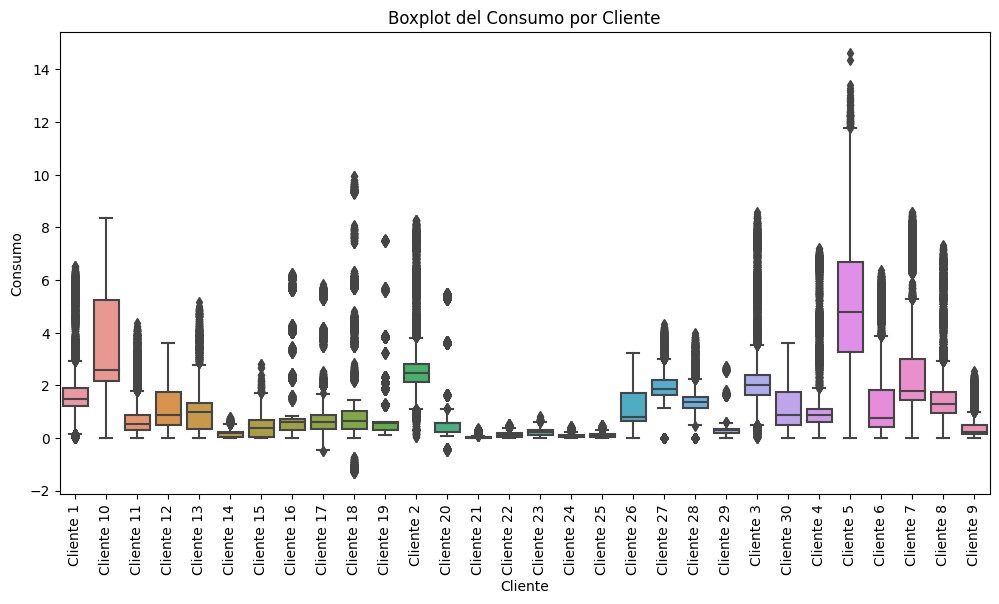

In [16]:
# Crear un boxplot del consumo por cliente
plt.figure(figsize=(12, 6))
sns.boxplot(data=result_df, x='Cliente', y='Active_energy')
plt.xlabel('Cliente')
plt.ylabel('Consumo')
plt.title('Boxplot del Consumo por Cliente')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

#### Distribución y anomalías por sector

c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


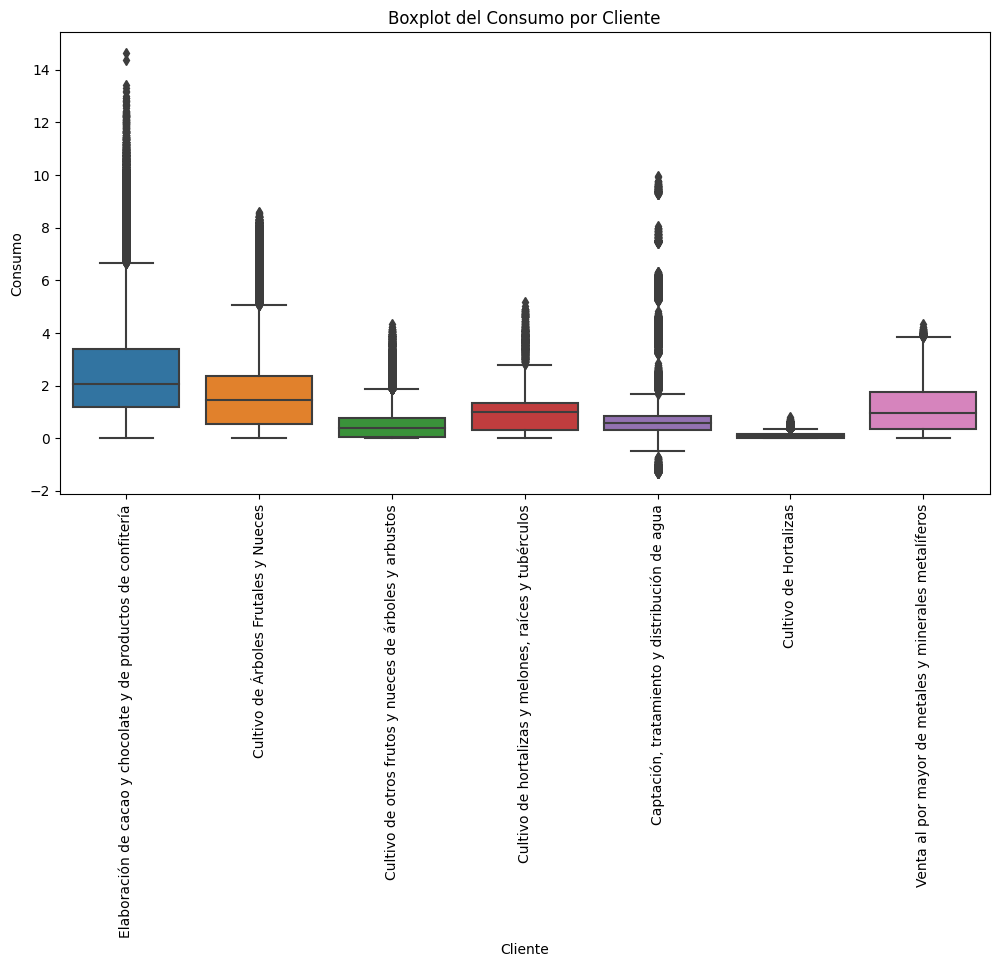

In [17]:
# Crear un boxplot del consumo por cliente
plt.figure(figsize=(12, 6))
sns.boxplot(data=result_df, x='Sector Económico', y='Active_energy')
plt.xlabel('Cliente')
plt.ylabel('Consumo')
plt.title('Boxplot del Consumo por Cliente')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

#### Correlaciones

C:\Users\dhoyoso\AppData\Roaming\Python\Python39\site-packages\dython\nominal.py:704: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\dhoyoso\AppData\Roaming\Python\Python39\site-packages\dython\nominal.py:705: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


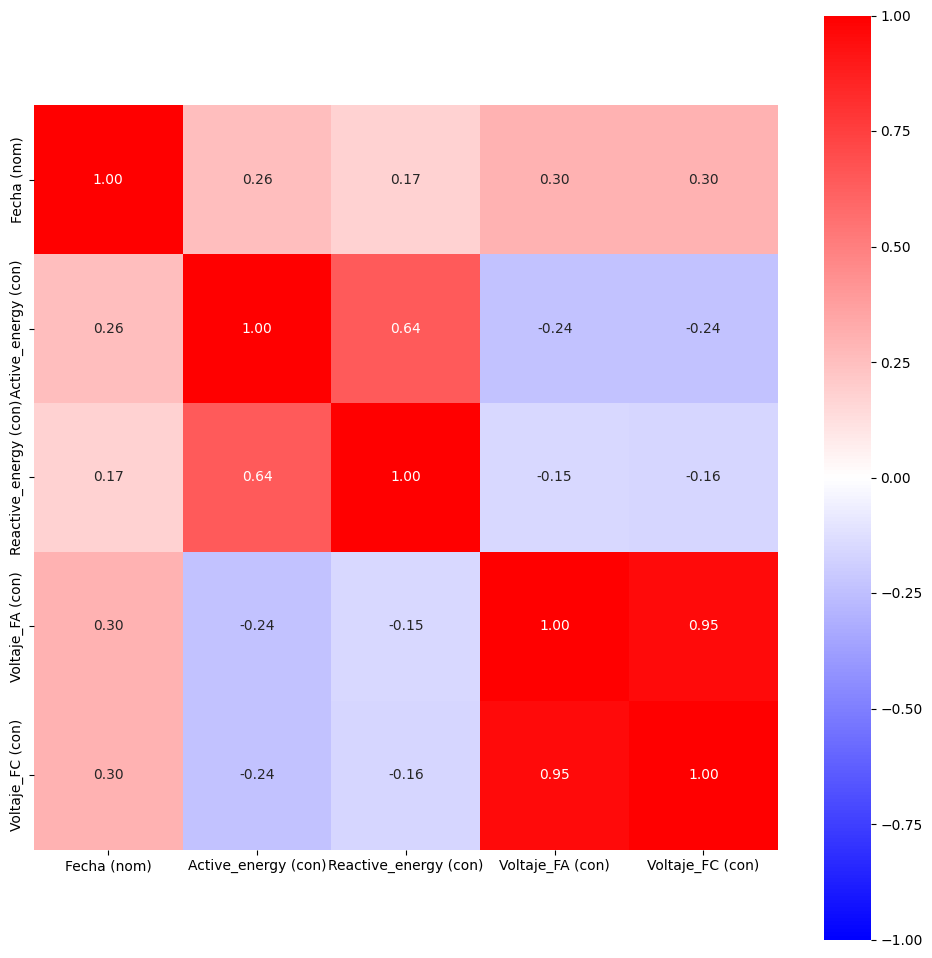

{'corr':                        Fecha (nom)  Active_energy (con)  \
 Fecha (nom)               1.000000             0.257385   
 Active_energy (con)       0.257385             1.000000   
 Reactive_energy (con)     0.173086             0.641789   
 Voltaje_FA (con)          0.297347            -0.240723   
 Voltaje_FC (con)          0.303624            -0.239892   
 
                        Reactive_energy (con)  Voltaje_FA (con)  \
 Fecha (nom)                         0.173086          0.297347   
 Active_energy (con)                 0.641789         -0.240723   
 Reactive_energy (con)               1.000000         -0.150958   
 Voltaje_FA (con)                   -0.150958          1.000000   
 Voltaje_FC (con)                   -0.158293          0.954814   
 
                        Voltaje_FC (con)  
 Fecha (nom)                    0.303624  
 Active_energy (con)           -0.239892  
 Reactive_energy (con)         -0.158293  
 Voltaje_FA (con)               0.954814  
 Voltaje_FC

In [18]:
nominal.associations(result_df[['Fecha','Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC']],figsize=(12,12),mark_columns=True, cmap = 'bwr')

#### Consumos por cliente

C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


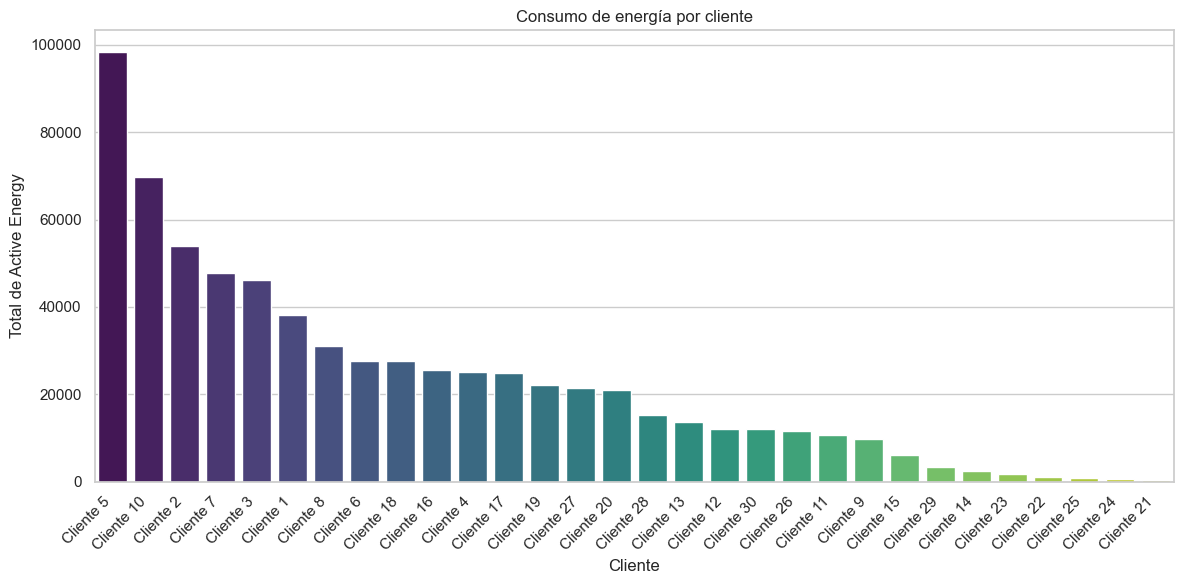

In [12]:
df_grouped = result_df.groupby('Cliente')['Active_energy'].sum().reset_index()
df_grouped = df_grouped.sort_values(by='Active_energy', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Cliente', y='Active_energy', data=df_grouped, palette='viridis')
barplot.set(xlabel='Cliente', ylabel='Total de Active Energy', title='Consumo de energía por cliente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

#### Consumos por sector

C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


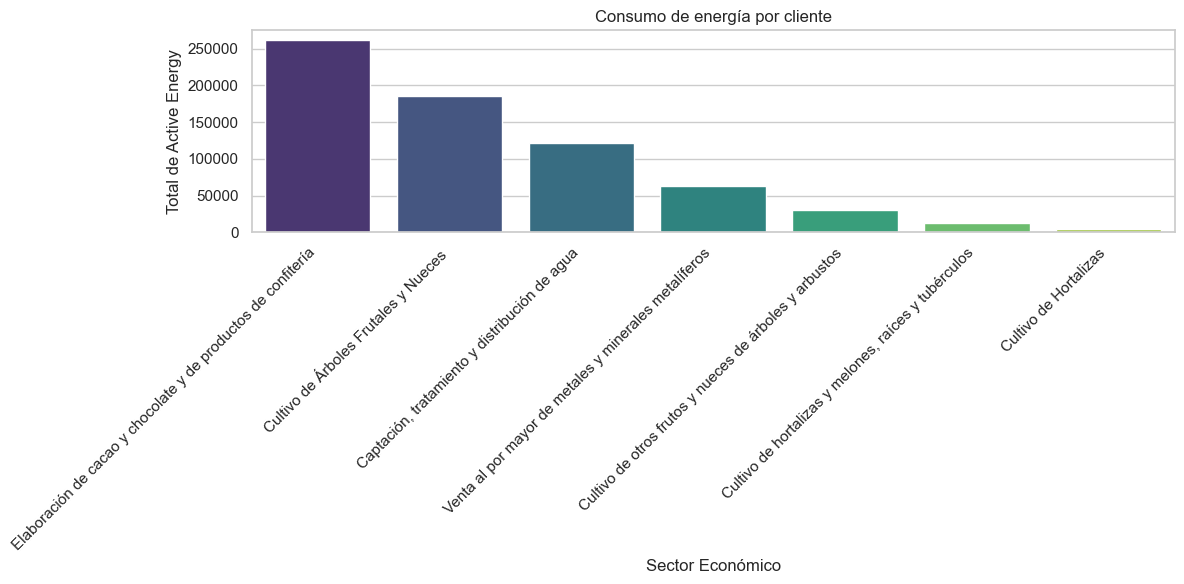

In [13]:
df_grouped = result_df.groupby('Sector Económico')['Active_energy'].sum().reset_index()
df_grouped = df_grouped.sort_values(by='Active_energy', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Sector Económico', y='Active_energy', data=df_grouped, palette='viridis')
barplot.set(xlabel='Sector Económico', ylabel='Total de Active Energy', title='Consumo de energía por cliente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

#### Consumos por mes y año

C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versi

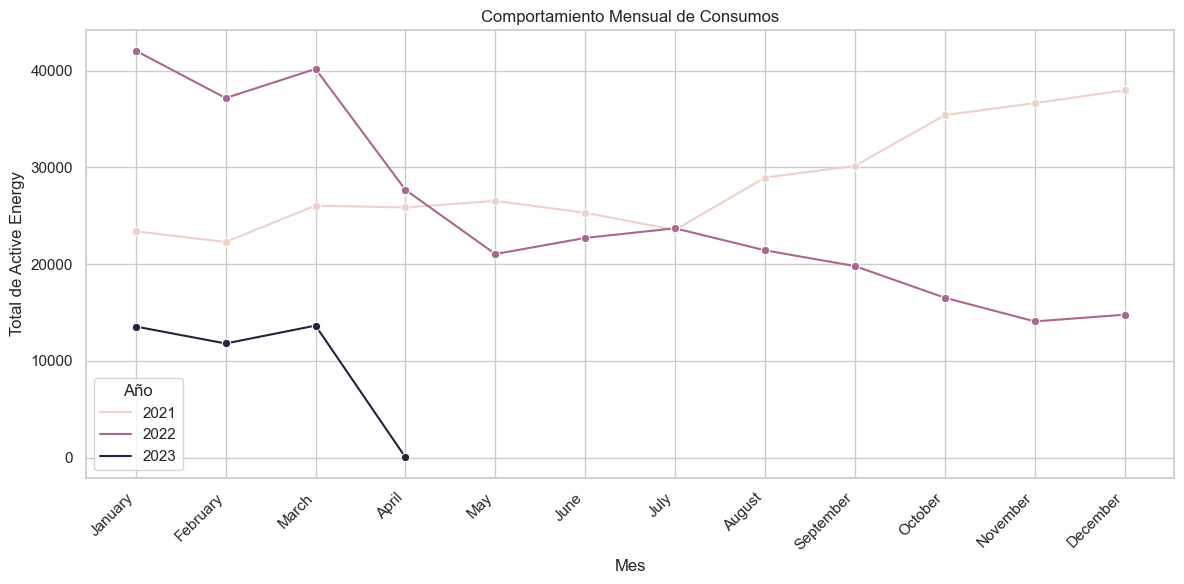

In [15]:
df_clean = result_df.copy()
df_clean['Fecha'] = pd.to_datetime(df_clean['Fecha'])
df_clean['Mes'] = df_clean['Fecha'].dt.month
df_clean['Año'] = df_clean['Fecha'].dt.year
df_monthly = df_clean.groupby(['Año', 'Mes'])['Active_energy'].sum().reset_index()


sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(x='Mes', y='Active_energy', hue='Año', data=df_monthly, marker='o')
lineplot.set(xlabel='Mes', ylabel='Total de Active Energy', title='Comportamiento Mensual de Consumos')
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45, ha='right')
plt.tight_layout()

plt.show()

#### Validar si hay saltos de hora

In [19]:
result_df['Fecha'] = pd.to_datetime(result_df['Fecha'])
diferencias = result_df.groupby('Cliente')['Fecha'].diff()
diferencias.value_counts()

Fecha
0 days 01:00:00    463395
Name: count, dtype: int64

#### Validar registros de energía activa negativos

c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


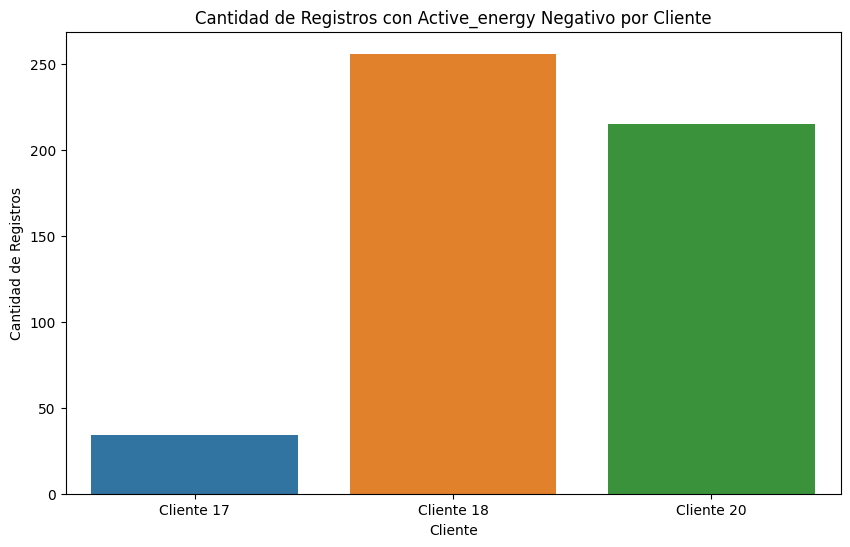

In [20]:
df_negativos = result_df[result_df['Active_energy']<0]
plt.figure(figsize=(10, 6))
sns.countplot(x='Cliente', data=df_negativos)
plt.title('Cantidad de Registros con Active_energy Negativo por Cliente')
plt.xlabel('Cliente')
plt.ylabel('Cantidad de Registros')
plt.show()

#### Promedio de consumo por Sector económico y Mes

C:\Users\dhoyoso\AppData\Local\Temp\ipykernel_15216\1687717676.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Fecha', y='Active_energy', hue='Sector Económico', data=promedio_consumo_por_sector, ci=None)
c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated an

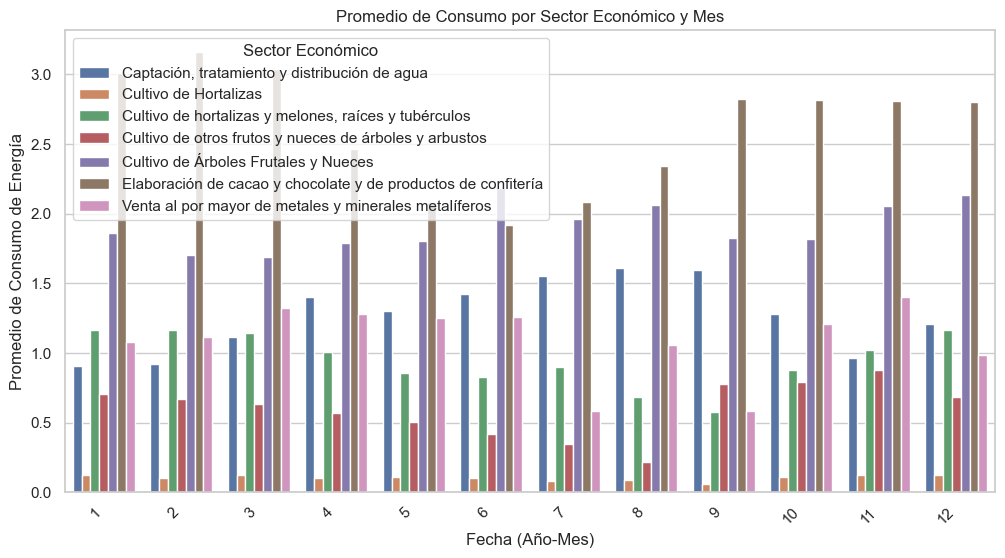

In [21]:
# Convierte la columna 'Fecha' a formato de año-mes para facilitar el cálculo
df_merged = result_df.copy()
df_merged['Fecha'] = df_merged['Fecha'].dt.month

# Calcula el promedio de consumo por sector económico y mes
promedio_consumo_por_sector = df_merged.groupby(['Sector Económico', 'Fecha'])['Active_energy'].mean().reset_index()

# Configuración de estilo de seaborn
sns.set(style="whitegrid")
 
# Crea un gráfico de barras utilizando seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Fecha', y='Active_energy', hue='Sector Económico', data=promedio_consumo_por_sector, ci=None)
 
# Ajusta las etiquetas y el título
plt.xticks(rotation=45, ha='right')
plt.title('Promedio de Consumo por Sector Económico y Mes')
plt.xlabel('Fecha (Año-Mes)')
plt.ylabel('Promedio de Consumo de Energía')
 
# Muestra el gráfico
plt.show()

#### Cantidad de registros por cliente y sector económico

c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

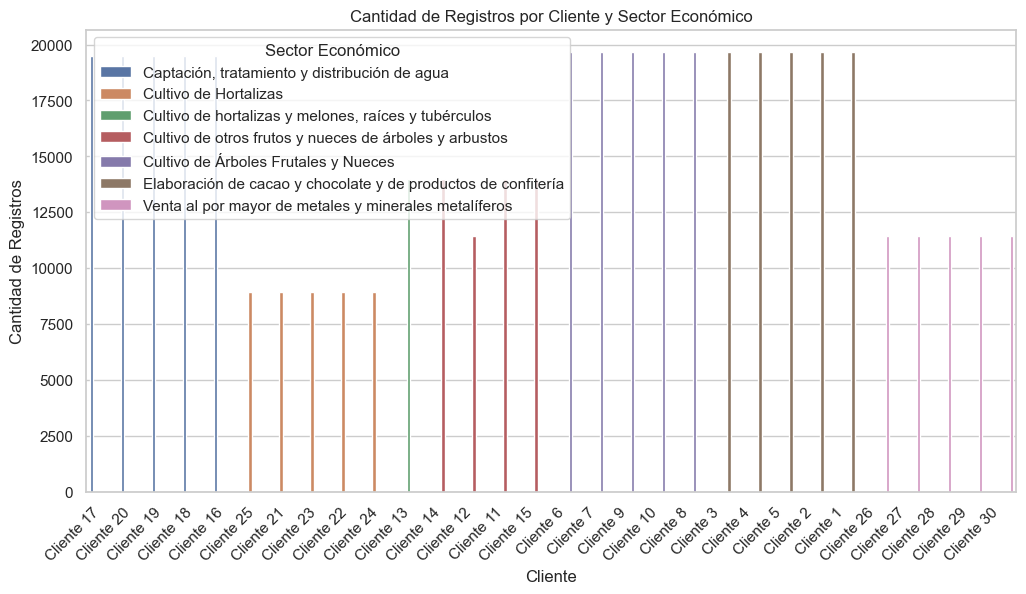

In [22]:
df_merged = result_df.copy()

# Agrupa el DataFrame por 'Cliente' y 'Sector Económico:' y cuenta la cantidad de registros
resumen_registros = df_merged.groupby(['Cliente', 'Sector Económico']).size().reset_index(name='Cantidad de Registros')

# Ordena el resumen por sector económico
resumen_registros_sorted = resumen_registros.sort_values(by='Sector Económico')

# Crea un gráfico de barras utilizando seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Cliente', y='Cantidad de Registros', hue='Sector Económico', data=resumen_registros_sorted)

# Ajusta las etiquetas y el título
plt.xticks(rotation=45, ha='right')
plt.title('Cantidad de Registros por Cliente y Sector Económico')
plt.xlabel('Cliente')
plt.ylabel('Cantidad de Registros')

# Coloca las etiquetas en la parte inferior del gráfico
plt.xticks(ticks=plt.xticks()[0], labels=resumen_registros_sorted['Cliente'].unique())

# Muestra el gráfico de barras
plt.show()

## Pre procesamiento de datos

#### 1. Se cambia el formato de la fecha y hora para que sean objetos DateTime y podamos manipularlos como fechas.

In [23]:
result_df['Fecha'] = pd.to_datetime(result_df['Fecha'])

#### 2. Imputación de valores negativos con cero.

In [24]:
result_df['Active_energy'] = result_df['Active_energy'].apply(lambda x: 0 if x < 0 else x)

In [25]:
result_df[result_df['Active_energy']<0]

,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,Cliente,Sector Económico


In [26]:
result_df[result_df['Reactive_energy']<0]

,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,Cliente,Sector Económico


#### 3. Los Outliers se mantienen hasta validar con el negocio si son errores u obedecen a los consumos anormales.

c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


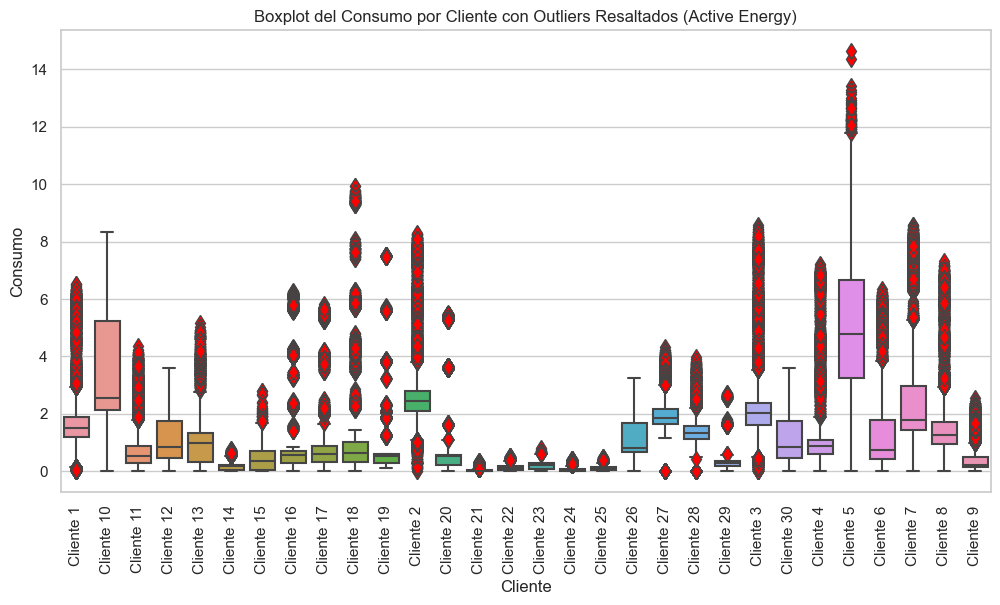

In [27]:
# Crear un boxplot del consumo por cliente
plt.figure(figsize=(12, 6))
sns.boxplot(data=result_df, x='Cliente', y='Active_energy', flierprops=dict(markerfacecolor='red', markersize=8))

plt.xlabel('Cliente')
plt.ylabel('Consumo')
plt.title('Boxplot del Consumo por Cliente con Outliers Resaltados (Active Energy)')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


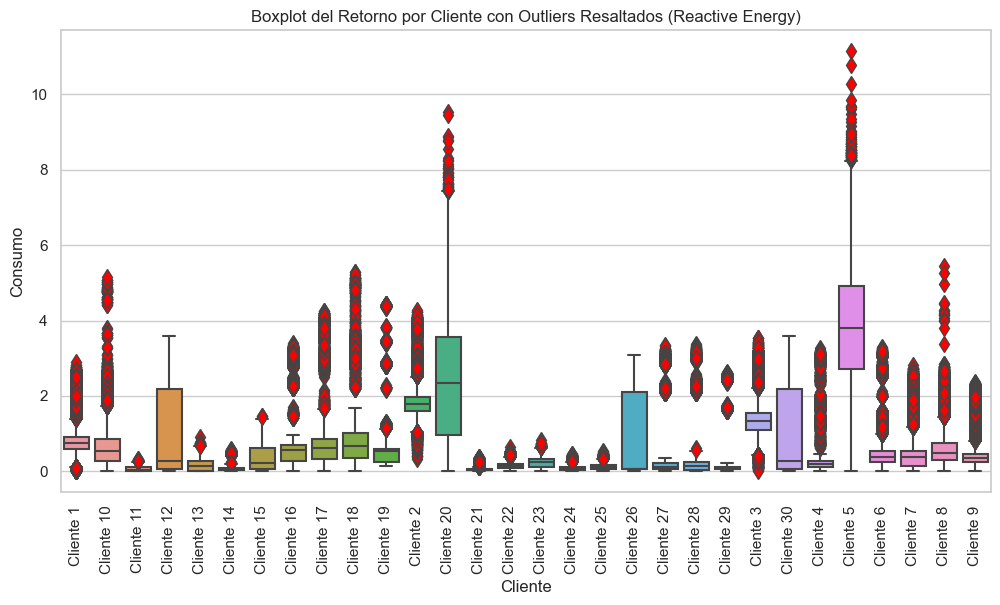

In [28]:
# Crear un boxplot del consumo por cliente
plt.figure(figsize=(12, 6))
sns.boxplot(data=result_df, x='Cliente', y='Reactive_energy', flierprops=dict(markerfacecolor='red', markersize=8))

plt.xlabel('Cliente')
plt.ylabel('Consumo')
plt.title('Boxplot del Retorno por Cliente con Outliers Resaltados (Reactive Energy)')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

#### 4. Reducción de dimensionalidad eliminando las columnas de Voltaje_FA y Voltaje_FC

In [29]:
result_df = result_df.drop('Voltaje_FA', axis = 1).drop('Voltaje_FC', axis = 1)

In [30]:
result_df.head()

,Fecha,Active_energy,Reactive_energy,Cliente,Sector Económico
0,2021-01-01 00:00:00,0.357841,0.282788,Cliente 1,Elaboración de cacao y chocolate y de producto...
1,2021-01-01 01:00:00,0.372264,0.431377,Cliente 1,Elaboración de cacao y chocolate y de producto...
2,2021-01-01 02:00:00,1.044687,0.338626,Cliente 1,Elaboración de cacao y chocolate y de producto...
3,2021-01-01 03:00:00,0.566425,0.495791,Cliente 1,Elaboración de cacao y chocolate y de producto...
4,2021-01-01 04:00:00,1.080556,0.472018,Cliente 1,Elaboración de cacao y chocolate y de producto...


#### 5. Normalización (Opcional dependiendo del modelo a entrenar)

In [31]:
scaler = StandardScaler()

result_df['Active_energy_scaled'] = scaler.fit_transform(result_df[['Active_energy']])
result_df['Reactive_energy_scaled'] = scaler.fit_transform(result_df[['Reactive_energy']])

In [32]:
result_df

,Fecha,Active_energy,Reactive_energy,Cliente,Sector Económico,Active_energy_scaled,Reactive_energy_scaled
0,2021-01-01 00:00:00,0.357841,0.282788,Cliente 1,Elaboración de cacao y chocolate y de producto...,-0.649098,-0.509385
1,2021-01-01 01:00:00,0.372264,0.431377,Cliente 1,Elaboración de cacao y chocolate y de producto...,-0.640701,-0.381163
2,2021-01-01 02:00:00,1.044687,0.338626,Cliente 1,Elaboración de cacao y chocolate y de producto...,-0.249266,-0.461201
3,2021-01-01 03:00:00,0.566425,0.495791,Cliente 1,Elaboración de cacao y chocolate y de producto...,-0.527675,-0.325578
4,2021-01-01 04:00:00,1.080556,0.472018,Cliente 1,Elaboración de cacao y chocolate y de producto...,-0.228385,-0.346093
...,...,...,...,...,...,...,...
463420,2023-03-31 20:00:00,0.231000,0.309493,Cliente 9,Cultivo de Árboles Frutales y Nueces,-0.722935,-0.486340
463421,2023-03-31 21:00:00,0.041937,0.314091,Cliente 9,Cultivo de Árboles Frutales y Nueces,-0.832994,-0.482373
463422,2023-03-31 22:00:00,0.231000,0.266937,Cliente 9,Cultivo de Árboles Frutales y Nueces,-0.722935,-0.523063
463423,2023-03-31 23:00:00,0.150296,0.312547,Cliente 9,Cultivo de Árboles Frutales y Nueces,-0.769915,-0.483705


#### 6. Filtrar dependiendo si vamos a entrenar modelos por cliente o por sector.

**Filtro por cliente**

In [33]:
numero_cliente = 1
cliente = 'Cliente '+ str(numero_cliente)
result_df[result_df['Cliente']==cliente]

,Fecha,Active_energy,Reactive_energy,Cliente,Sector Económico,Active_energy_scaled,Reactive_energy_scaled
0,2021-01-01 00:00:00,0.357841,0.282788,Cliente 1,Elaboración de cacao y chocolate y de producto...,-0.649098,-0.509385
1,2021-01-01 01:00:00,0.372264,0.431377,Cliente 1,Elaboración de cacao y chocolate y de producto...,-0.640701,-0.381163
2,2021-01-01 02:00:00,1.044687,0.338626,Cliente 1,Elaboración de cacao y chocolate y de producto...,-0.249266,-0.461201
3,2021-01-01 03:00:00,0.566425,0.495791,Cliente 1,Elaboración de cacao y chocolate y de producto...,-0.527675,-0.325578
4,2021-01-01 04:00:00,1.080556,0.472018,Cliente 1,Elaboración de cacao y chocolate y de producto...,-0.228385,-0.346093
...,...,...,...,...,...,...,...
19676,2023-03-31 20:00:00,1.511845,0.642091,Cliente 1,Elaboración de cacao y chocolate y de producto...,0.022680,-0.199332
19677,2023-03-31 21:00:00,1.395845,0.687746,Cliente 1,Elaboración de cacao y chocolate y de producto...,-0.044847,-0.159935
19678,2023-03-31 22:00:00,0.976828,0.442356,Cliente 1,Elaboración de cacao y chocolate y de producto...,-0.288768,-0.371690
19679,2023-03-31 23:00:00,0.979561,0.451811,Cliente 1,Elaboración de cacao y chocolate y de producto...,-0.287177,-0.363530


**Filtro por sector**

Se obtiene una lista de los sectores

In [34]:
lista_sectores = result_df['Sector Económico'].unique()
lista_sectores

array(['Elaboración de cacao y chocolate y de productos de confitería',
       'Cultivo de Árboles Frutales y Nueces',
       'Cultivo de otros frutos y nueces de árboles y arbustos',
       'Cultivo de hortalizas y melones, raíces y tubérculos',
       'Captación, tratamiento y distribución de agua',
       'Cultivo de Hortalizas',
       'Venta al por mayor de metales y minerales metalíferos'],
      dtype=object)

Se seleccionan los parámetros para el filtro. Por ahora se debe seleccionar el sector a filtrar y se deja una función de agregación por promedio, sin embargo, la idea es que se pueda cambiar cuando estemos evaluando los modelos con el fin de determinar la mejor agregación que mantenga la representación de las anomalías por sector y cliente.

In [35]:
# Parámetros de la transformación
indice_sector = 0
def funcion_de_agregacion(num_list):
    return np.mean(num_list)

Se corre el filtro con la agregación para energía activa.

In [36]:
filtered_df = result_df[result_df['Sector Económico']==lista_sectores[indice_sector]]
filtered_df.groupby('Fecha')['Active_energy'].apply(funcion_de_agregacion)

Fecha
2021-01-01 00:00:00    1.615544
2021-01-01 01:00:00    1.638612
2021-01-01 02:00:00    1.505060
2021-01-01 03:00:00    1.169721
2021-01-01 04:00:00    1.782942
                         ...   
2023-03-31 20:00:00    1.643559
2023-03-31 21:00:00    2.178783
2023-03-31 22:00:00    1.640862
2023-03-31 23:00:00    1.613024
2023-04-01 00:00:00    2.092200
Name: Active_energy, Length: 19681, dtype: float64

Se corre el filtro con la agregación para energía reactiva.

In [37]:
filtered_df = result_df[result_df['Sector Económico']==lista_sectores[indice_sector]]
filtered_df.groupby('Fecha')['Reactive_energy'].apply(funcion_de_agregacion)

Fecha
2021-01-01 00:00:00    0.729071
2021-01-01 01:00:00    1.403620
2021-01-01 02:00:00    1.215604
2021-01-01 03:00:00    1.205221
2021-01-01 04:00:00    1.221821
                         ...   
2023-03-31 20:00:00    1.902545
2023-03-31 21:00:00    1.491079
2023-03-31 22:00:00    1.803423
2023-03-31 23:00:00    1.127237
2023-04-01 00:00:00    0.821098
Name: Reactive_energy, Length: 19681, dtype: float64

#### 7. Volver índice la columna fecha.

Primero hay que filtrar con alguno de los del paso 6, en este caso, lo haremos por cliente.

In [38]:
numero_cliente = 1
cliente = 'Cliente '+ str(numero_cliente)
filtrado_con_indice = result_df[result_df['Cliente']==cliente]

Se setea el índice como la columna fecha.

In [39]:
filtrado_con_indice.set_index('Fecha', inplace=True)

In [40]:
filtrado_con_indice[['Active_energy', 'Reactive_energy']]

,Active_energy,Reactive_energy
Fecha,,
2021-01-01 00:00:00,0.357841,0.282788
2021-01-01 01:00:00,0.372264,0.431377
2021-01-01 02:00:00,1.044687,0.338626
2021-01-01 03:00:00,0.566425,0.495791
2021-01-01 04:00:00,1.080556,0.472018
...,...,...
2023-03-31 20:00:00,1.511845,0.642091
2023-03-31 21:00:00,1.395845,0.687746
2023-03-31 22:00:00,0.976828,0.442356
